In [11]:
import json
import pandas as pd
from pathlib import Path

# Path to iCloud Auto Export directory
export_dir = Path("/mnt/c/Users/nadav/iCloudDrive/iCloud~com~ifunography~HealthExport/Runlytics")

# latest export file
files = sorted(export_dir.glob("HealthAutoExport-*.json"))
latest = files[-1]
print(f"Using {latest.name}")

# Load and inspect
with open(latest, "r") as f:
    data = json.load(f)


Using HealthAutoExport-2025-10-07.json


In [12]:
print("Top-level keys:", list(data.keys()))
print("Keys inside data['data']:", list(data["data"].keys()))

metrics = data["data"]["metrics"]
print(f"Found {len(metrics)} metric types.")


Top-level keys: ['data']
Keys inside data['data']: ['metrics']
Found 23 metric types.


In [14]:
data

{'data': {'metrics': [{'data': [{'qty': 1,
      'date': '2025-10-07 07:00:00 -0400'},
     {'qty': 1, 'date': '2025-10-07 08:00:00 -0400'},
     {'date': '2025-10-07 09:00:00 -0400', 'qty': 1},
     {'date': '2025-10-07 10:00:00 -0400', 'qty': 1},
     {'qty': 1, 'date': '2025-10-07 11:00:00 -0400'},
     {'date': '2025-10-07 12:00:00 -0400', 'qty': 1},
     {'date': '2025-10-07 13:00:00 -0400', 'qty': 1},
     {'date': '2025-10-07 14:00:00 -0400', 'qty': 1},
     {'date': '2025-10-07 15:00:00 -0400', 'qty': 1},
     {'date': '2025-10-07 17:00:00 -0400', 'qty': 1},
     {'qty': 1, 'date': '2025-10-07 20:00:00 -0400'}],
    'name': 'apple_stand_hour',
    'units': 'count'},
   {'data': [{'date': '2025-10-07 07:12:00 -0400',
      'qty': 1,
      'source': 'nadav’s Apple\xa0Watch'},
     {'source': 'nadav’s Apple\xa0Watch',
      'date': '2025-10-07 07:18:00 -0400',
      'qty': 1},
     {'qty': 1,
      'date': '2025-10-07 07:20:00 -0400',
      'source': 'nadav’s Apple\xa0Watch'},
   

In [15]:
data["data"]["metrics"]


[{'data': [{'qty': 1, 'date': '2025-10-07 07:00:00 -0400'},
   {'qty': 1, 'date': '2025-10-07 08:00:00 -0400'},
   {'date': '2025-10-07 09:00:00 -0400', 'qty': 1},
   {'date': '2025-10-07 10:00:00 -0400', 'qty': 1},
   {'qty': 1, 'date': '2025-10-07 11:00:00 -0400'},
   {'date': '2025-10-07 12:00:00 -0400', 'qty': 1},
   {'date': '2025-10-07 13:00:00 -0400', 'qty': 1},
   {'date': '2025-10-07 14:00:00 -0400', 'qty': 1},
   {'date': '2025-10-07 15:00:00 -0400', 'qty': 1},
   {'date': '2025-10-07 17:00:00 -0400', 'qty': 1},
   {'qty': 1, 'date': '2025-10-07 20:00:00 -0400'}],
  'name': 'apple_stand_hour',
  'units': 'count'},
 {'data': [{'date': '2025-10-07 07:12:00 -0400',
    'qty': 1,
    'source': 'nadav’s Apple\xa0Watch'},
   {'source': 'nadav’s Apple\xa0Watch',
    'date': '2025-10-07 07:18:00 -0400',
    'qty': 1},
   {'qty': 1,
    'date': '2025-10-07 07:20:00 -0400',
    'source': 'nadav’s Apple\xa0Watch'},
   {'qty': 1,
    'date': '2025-10-07 09:23:00 -0400',
    'source': 'na

In [16]:
path = Path("data/raw/apple_health.parquet")
df = pd.read_parquet(path)
df.shape


(32027, 9)

In [17]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32027 entries, 0 to 32026
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   metric       32027 non-null  object 
 1   unit         32027 non-null  object 
 2   date         32027 non-null  object 
 3   qty          30811 non-null  float64
 4   source       27962 non-null  object 
 5   Min          1216 non-null   float64
 6   Avg          1216 non-null   float64
 7   Max          1216 non-null   float64
 8   source_file  32027 non-null  object 
dtypes: float64(4), object(5)
memory usage: 2.2+ MB


,metric,unit,date,qty,source,Min,Avg,Max,source_file
0,body_fat_percentage,%,2025-10-01 08:03:00 -0400,12.6,None,NaN,NaN,NaN,HealthAutoExport-2025-10-01 2.json
1,body_fat_percentage,%,2025-10-01 08:04:00 -0400,12.6,None,NaN,NaN,NaN,HealthAutoExport-2025-10-01 2.json
2,body_mass_index,count,2025-10-01 08:03:00 -0400,24.0,None,NaN,NaN,NaN,HealthAutoExport-2025-10-01 2.json
3,body_mass_index,count,2025-10-01 08:04:00 -0400,24.0,None,NaN,NaN,NaN,HealthAutoExport-2025-10-01 2.json
4,apple_stand_hour,count,2025-10-01 07:00:00 -0400,1.0,None,NaN,NaN,NaN,HealthAutoExport-2025-10-01 2.json


In [18]:
metric_counts = df["metric"].value_counts().sort_values(ascending=False)
metric_counts.head(20)


metric
basal_energy_burned                  10121
active_energy                         6296
step_count                            3055
walking_running_distance              3055
apple_stand_time                      2350
physical_effort                       1577
heart_rate                            1216
time_in_daylight                      1144
apple_exercise_time                    658
walking_speed                          510
walking_step_length                    510
walking_double_support_percentage      497
walking_asymmetry_percentage           233
headphone_audio_exposure               136
apple_stand_hour                       102
running_power                           78
running_speed                           78
running_ground_contact_time             77
running_vertical_oscillation            77
running_stride_length                   77
Name: count, dtype: int64

In [21]:
# Choose metric of interest
m = "heart_rate"
sub = df.query("metric == @m").copy()

# Parse time
sub["date"] = pd.to_datetime(sub["date"])

# Convert to numeric qty
sub["qty"] = pd.to_numeric(sub["qty"], errors="coerce")


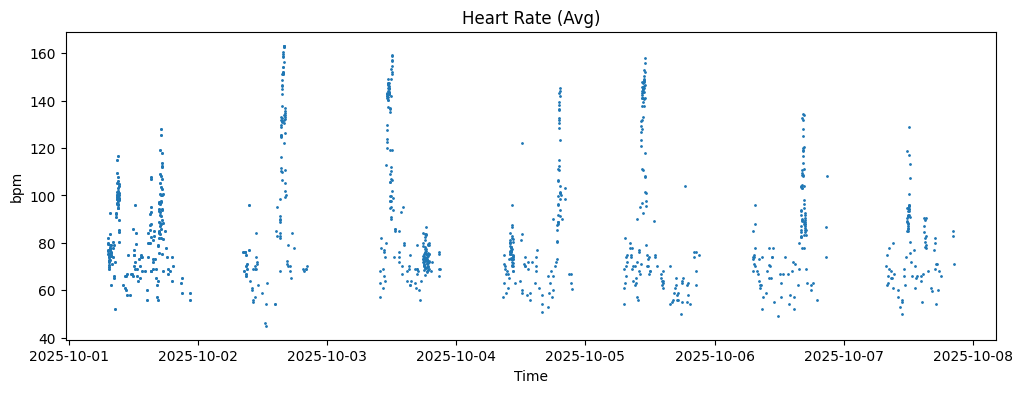

In [27]:
sub["date"] = pd.to_datetime(sub["date"])
plt.figure(figsize=(12,4))
plt.plot(sub["date"], sub["Avg"], '.', markersize=2)
plt.title("Heart Rate (Avg)")
plt.xlabel("Time")
plt.ylabel("bpm")
plt.show()


In [24]:
sub

,metric,unit,date,qty,source,Min,Avg,Max,source_file
452,heart_rate,count/min,2025-10-01 07:20:00-04:00,NaN,nadav’s Apple Watch,78.0,81.850000,85.0,HealthAutoExport-2025-10-01 2.json
453,heart_rate,count/min,2025-10-01 07:21:00-04:00,NaN,nadav’s Apple Watch,76.0,79.702970,90.0,HealthAutoExport-2025-10-01 2.json
454,heart_rate,count/min,2025-10-01 07:22:00-04:00,NaN,nadav’s Apple Watch,75.0,76.897059,81.0,HealthAutoExport-2025-10-01 2.json
455,heart_rate,count/min,2025-10-01 07:23:00-04:00,NaN,nadav’s Apple Watch,73.0,75.077320,77.0,HealthAutoExport-2025-10-01 2.json
456,heart_rate,count/min,2025-10-01 07:24:00-04:00,NaN,nadav’s Apple Watch,76.0,79.915000,84.0,HealthAutoExport-2025-10-01 2.json
...,...,...,...,...,...,...,...,...,...
28571,heart_rate,count/min,2025-10-07 17:35:00-04:00,NaN,nadav’s Apple Watch,68.0,68.000000,68.0,HealthAutoExport-2025-10-07.json
28572,heart_rate,count/min,2025-10-07 17:58:00-04:00,NaN,nadav’s Apple Watch,66.0,66.000000,66.0,HealthAutoExport-2025-10-07.json
28573,heart_rate,count/min,2025-10-07 20:16:00-04:00,NaN,nadav’s Apple Watch,85.0,85.000000,85.0,HealthAutoExport-2025-10-07.json
28574,heart_rate,count/min,2025-10-07 20:19:00-04:00,NaN,nadav’s Apple Watch,83.0,83.000000,83.0,HealthAutoExport-2025-10-07.json


In [25]:
summary = (
    df.groupby("metric")["qty"]
      .agg(["count", "mean", "min", "max"])
      .sort_values("count", ascending=False)
)
summary.head(15)

,count,mean,min,max
metric,,,,
basal_energy_burned,10121,1.729557,0.320121,1984.000000
active_energy,6296,1.289847,0.008461,16.327127
step_count,3055,33.687141,0.009939,161.458928
walking_running_distance,3055,0.017259,0.000005,0.132493
apple_stand_time,2350,0.588085,0.200000,1.000000
physical_effort,1577,3.980282,1.000000,14.900000
time_in_daylight,1144,0.866259,0.020651,1.000000
apple_exercise_time,658,1.004559,0.042667,1.957333
walking_speed,510,2.806354,1.163207,4.652827


In [28]:
df.groupby("metric")[["Min","Avg","Max"]].count().sort_values("Avg", ascending=False).head(10)


,Min,Avg,Max
metric,,,
heart_rate,1216,1216,1216
active_energy,0,0,0
apple_exercise_time,0,0,0
apple_stand_time,0,0,0
apple_stand_hour,0,0,0
body_fat_percentage,0,0,0
body_mass_index,0,0,0
cardio_recovery,0,0,0
basal_energy_burned,0,0,0


<Axes: >

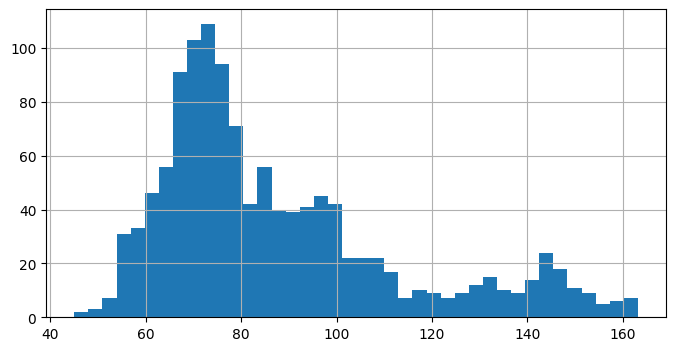

In [29]:
sub = df[df["metric"]=="heart_rate"].copy()
sub["Avg"].hist(bins=40, figsize=(8,4))


In [30]:
df["metric"].value_counts()

metric
basal_energy_burned                  10121
active_energy                         6296
step_count                            3055
walking_running_distance              3055
apple_stand_time                      2350
physical_effort                       1577
heart_rate                            1216
time_in_daylight                      1144
apple_exercise_time                    658
walking_speed                          510
walking_step_length                    510
walking_double_support_percentage      497
walking_asymmetry_percentage           233
headphone_audio_exposure               136
apple_stand_hour                       102
running_power                           78
running_speed                           78
running_ground_contact_time             77
running_vertical_oscillation            77
running_stride_length                   77
flights_climbed                         67
stair_speed_down                        25
heart_rate_variability                  15
stai

In [88]:
RAW_PATH = Path("data/raw/strava_activities.parquet")
PROCESSED_PATH = Path("data/processed/manual_corrections.json")  # optional future output


In [77]:
df_raw = pd.read_parquet(RAW_PATH)
print(f"{len(df_raw):,} activities loaded.")
df_raw.head(3)


305 activities loaded.


,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,id,start_date,...,athlete.resource_state,map.id,map.summary_polyline,map.resource_state,workout_type,average_watts,max_watts,weighted_average_watts,device_watts,kilojoules
0,2,Afternoon Walk,1109.8,851,946,32.8,Walk,Walk,16195765986,2025-10-19T19:19:52Z,...,1,a16195765986,_nllF`zkuMf@?b@Dr@BJAZPJ@pBJ`A@fFEbCDpAMrBGLIP...,2,NaN,NaN,NaN,NaN,None,NaN
1,2,Afternoon Run,6828.9,2372,2375,52.0,Run,Run,16195766198,2025-10-19T18:40:16Z,...,1,a16195766198,kujlFn~kuMHEd@MXMRWFMDQ?iAGm@?_@Jy@DOFGJIb@MvB...,2,NaN,255.0,437.0,262.0,True,604.7
2,2,Night Walk,1250.0,1056,1222,52.6,Walk,Walk,16195765991,2025-10-19T02:09:42Z,...,1,a16195765991,uwklFl_luMbARRb@Dz@Ll@tALlAIfASzCwArAWbB@`AV\|...,2,NaN,NaN,NaN,NaN,None,NaN


In [78]:
activity_summary = (
    df_raw["type"]
    .value_counts()
    .rename_axis("type")
    .reset_index(name="count")
)

activity_summary


,type,count
0,Walk,198
1,WeightTraining,53
2,Run,40
3,Yoga,9
4,Workout,3
5,Ride,2


In [81]:
runs = df_raw[df_raw["type"].eq("Run")].copy()

print(f"Runs in dataset: {len(runs)}")
runs[["name", "start_date_local", "distance", "moving_time", "elapsed_time", "trainer", "sport_type"]].head(10)


Runs in dataset: 40


,name,start_date_local,distance,moving_time,elapsed_time,trainer,sport_type
1,Afternoon Run,2025-10-19T14:40:16Z,6828.9,2372,2375,False,Run
3,Afternoon Run,2025-10-18T15:27:12Z,2725.7,1083,1083,True,Run
7,Lunch Run,2025-10-17T11:13:53Z,3470.4,1229,1619,True,Run
8,Lunch Run,2025-10-17T11:05:08Z,708.8,295,295,True,Run
14,Afternoon Run,2025-10-14T17:49:52Z,7019.8,2428,2433,False,Run
17,Lunch Run,2025-10-13T12:51:19Z,3827.5,1413,1593,True,Run
20,Lunch Run,2025-10-12T11:46:55Z,5042.5,1646,1649,False,Run
32,Morning Run,2025-10-05T10:20:18Z,6524.4,2401,2589,False,Run
36,Lunch Run,2025-10-03T11:54:57Z,1854.5,611,611,True,Run
38,Lunch Run,2025-10-03T11:03:30Z,6034.9,2119,2179,False,Run


In [83]:
runs["indoor_flag"] = runs["trainer"].fillna(False) | runs["sport_type"].eq("VirtualRun")
print(runs["indoor_flag"].value_counts())

runs.groupby("indoor_flag")[["distance", "elapsed_time"]].agg(["count", "mean", "max"]).round(2)


indoor_flag
True     22
False    18
Name: count, dtype: int64


distance                  elapsed_time               
               count     mean     max        count     mean   max
indoor_flag                                                      
False             18  4275.76  7515.0           18  1735.61  2856
True              22  2013.77  6392.7           22   956.05  2925

In [89]:
df_processed = pd.read_json(PROCESSED_PATH)
print(f"{len(df_processed):,} activities loaded.")
df_processed.head(3)


6 activities loaded.


,1970-07-07 07:42:24.517,1970-07-07 04:18:38.784
distance_km,4.6,5.0
duration_min,24.3,26.983333
intensity,9,7


In [90]:
df_processed

,1970-07-07 07:42:24.517,1970-07-07 04:18:38.784
distance_km,4.6,5.0
duration_min,24.3,26.983333
intensity,9,7
intervals,"[{'distance_km': 1.0, 'speed_kmh': 16.0, 'rest...",NaN
notes,,NaN
corrected_on,2025-10-20T17:08:45.450564,2025-10-20T17:09:10.164676
